# Dimensions of Non Ordinary Experiences: Natural Language Processing of Trascendent Experience Reports

## Senior Thesis

University of Pennsylvania, Fall 2019

**Alex Tianheng Zhao**  
alextzhao.io  
alexzhao@seas.upenn.edu  
School of Engineering and Applied Science, University of Pennsylvania  
The Wharton School, University of Pennsylvania  


**Professor Max Mintz, PhD**  
CIS Senior Thesis Program Coordinator  
University of Pennsylvania  

Updated (Change of Topic): November 17th, 2019  
Proposal Originally Submitted: September 3rd, 2019  
Archive: see [here](https://docs.google.com/document/d/1rwvZtqod3elgEE6wz93fwwqgGn3bhK0DHyhDoCmEIHA/edit?usp=sharing)  

## **Thesis Advisors**
- **Chris Callison-Burch, PhD** { ccb@upenn.edu }  
Department of Computer and Information Science (SEAS), University of Pennsylvania  
 
- **Lyle Ungar, PhD** { ungar@cis.upenn.edu }  
Department of Computer and Information Science; additional appoints in the Departments of Bioengineering (SEAS); Genomics and Computational Biology (Penn Medicine); Operations, Informations, and Decisions (Wharton); Psychology (SAS), University of Pennsylvania  


### **Useful Links:**
- [Thesis Master Document](https://docs.google.com/document/d/1dk1xXyfHqfdn5Tld-KZu7toiNYQeJHQv7BUlG7uSqP4/edit#)
- [Thesis Scratch Paper](https://docs.google.com/document/d/1BP5Z2J9tJvRJB5J-hthQIGrdSnD0Bcvctd7kHqbUUKw/edit?usp=sharing)
- [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links)

In [15]:
# Sets up the ability to use R in a jupyter notebook
# https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook
# To use R, add %%R to the beginning of a cell, before any code and any comments
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%%R
# Installs the proper R packages
if(!require('pacman')) {
  install.packages('pacman', repos = "http://cran.us.r-project.org")
}
pacman::p_load(dplyr, leaps, car, tidyverse, GGally, reshape2, data.table, ggcorrplot, bestglm, glmnet, mapproj, pROC, data.tale, tm, SnowballC, wordcloud, RColorBrewer, reshape2) 


R[write to console]: Loading required package: pacman



In [14]:
%%R
tripReports <- fread("trips.csv")
tripReports.df <- as.data.frame(tripReports)
glimpse(tripReports)



Observations: 19,924
Variables: 3
$ report    <chr> "After having had some success with other forms of legal hi…
$ title     <chr> "Sideways World", "Physical Wellbeing = Crucial", "The Artf…
$ substance <chr> "Salvia divinorum (5x extract)", "Mushrooms", "Methylone", …
                             substance
 1:      Salvia divinorum (5x extract)
 2:                          Mushrooms
 3:                          Methylone
 4:                      LSD & Lithium
 5:                          5-MeO-DMT
 6:      Salvia divinorum (6x extract)
 7:                           Cannabis
 8:                             2C-T-2
 9:                              6-APB
10:                            2-C-T-2
11:                             Acacia
12: Mushrooms - P. Cubensis & Cannabis
13:                   Kratom (extract)
14:            Methocarbamol (Robaxin)
15:                      H.B. Woodrose
16:              Kratom (fresh leaves)
17:                  Cannabis & Kratom
18:                     2C-

In [17]:
%%R
# Examine the substances present in the dataset
tripReports %>% select(substance) %>% write.table(file = "substances-all", append=FALSE, col.names = FALSE, row.names = FALSE, sep = "\n")

In [18]:
%%R

## Manipulate the dataframe to have 1 hot encoding for substances
tripReports$substance <- tolower(tripReports$substance)
tripReports <- as.data.frame(tripReports)
substances.of.interest <- c("substance.mushrooms", "substance.lsd", "substance.mescaline", "substance.cannabis", "substance.mdma", "substance.ayahuasca", "substance.nitrous_oxide", "substance.salvia", "substance.methamphetamine", "substance.dmt", "substance.5_meo_dmt", "substance.alcohol", "substance.ketamine", "substance.ibogaine", "substance.pcp", "substance.kava", "substance.kratom", "substance.morning_glory", "substance.syrian_rue", "substance.unknown", "substance.UNK")

for (sub in substances.of.interest) {
  tripReports[sub] = 0
}

### Adding one hot encodings to the substances
tripReports$substance.mushrooms[grepl("mushroom|mushhrooms|mushooms|psilocin|psilocybin|psilocybe", tripReports$substance)] <- 1
tripReports$substance.lsd[grepl("lysergic acid|lsd", tripReports$substance)] <- 1
tripReports$substance.mescaline[grepl("mescaline|peyote", tripReports$substance)] <- 1
tripReports$substance.cannabis[grepl("cannabis|canabis|cannabbis|cannabinoid|cannabus|cannibis|cannibus| thc ", tripReports$substance)] <- 1
tripReports$substance.mdma[grepl("mdma|ecstacy|ecstasy|ectasy|molly", tripReports$substance)] <- 1
tripReports$substance.ayahuasca[grepl("ayahuasca|ayahausca|ayahusca|p. viridis|p.viridis|b.caapi|b. caapi|cappi|viridis", tripReports$substance)] <- 1
tripReports$substance.nitrous_oxide[grepl("nitric|nitrites|nitrogen|nitrous|whippets", tripReports$substance)] <- 1
tripReports$substance.salvia[grepl("salia|saliva|salivia|sally|salva|salvia|salvinorin", tripReports$substance)] <- 1
tripReports$substance.methamphetamine[grepl("met|meth|methampetamine|methamphetamine|speed", tripReports$substance)] <- 1
# dmt
tripReports$substance.dmt[grepl("nn-dmt", tripReports$substance)] <- 1
tripReports$substance.dmt[tripReports$substance == "dmt"] <- 1 # cannot just grep dmt otherwise this will include 5-meo-dmt
#5-meo-dmt
tripReports$substance.5_meo_dmt[grepl("5 meo-dmt|5-meo dmt|5-meo-dmt|5meo-dmt", tripReports$substance)] <- 1
tripReports$substance.alcohol[grepl("alchohol|alcohol", tripReports$substance)] <- 1
tripReports$substance.ketamine[grepl("ketamin|ketamine", tripReports$substance)] <- 1
tripReports$substance.ibogaine[grepl("iboga|ibogaine", tripReports$substance)] <- 1
tripReports$substance.pcp[grepl("pcp", tripReports$substance)] <- 1
tripReports$substance.kava[grepl("kava", tripReports$substance)] <- 1
tripReports$substance.kratom[grepl("kratom", tripReports$substance)] <- 1
tripReports$substance.morning_glory[grepl("glory|glories", tripReports$substance)] <- 1
tripReports$substance.syrian_rue[grepl("syrian rue|rue", tripReports$substance)] <- 1
tripReports$substance.unknown[grepl("unknown|unidentified|unkown", tripReports$substance)] <- 1

glimpse(tripReports)


Observations: 19,924
Variables: 24
$ report                    <chr> "After having had some success with other f…
$ title                     <chr> "Sideways World", "Physical Wellbeing = Cru…
$ substance                 <chr> "salvia divinorum (5x extract)", "mushrooms…
$ substance.mushrooms       <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.lsd             <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.mescaline       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.cannabis        <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.mdma            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.ayahuasca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.nitrous_oxide   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.salvia          <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.methamphetamine <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ substance.dmt  

In [21]:
%%R

## Number of each substance: NOTE: a report might have more than one substance
tripSubstances <- tripReports %>% select(-report, -title, -substance)
tripReportsCount <- data.frame(substance = names(tripSubstances), count = colSums(tripSubstances))
tripReportsCountSorted <- tripReportsCount %>% arrange(desc(count))

                   substance count
1         substance.cannabis  3110
2        substance.mushrooms  1686
3           substance.salvia  1556
4             substance.mdma  1188
5              substance.lsd  1131
6  substance.methamphetamine   929
7          substance.alcohol   928
8    substance.morning_glory   427
9    substance.nitrous_oxide   300
10       substance.5_meo_dmt   297
11      substance.syrian_rue   293
12        substance.ketamine   289
13          substance.kratom   207
14       substance.ayahuasca   172
15             substance.dmt   167
16            substance.kava   167
17             substance.pcp    81
18       substance.mescaline    73
19         substance.unknown    47
20        substance.ibogaine    43
21             substance.UNK     0


In [22]:
%%R

## Find reports with only one unique substance

tripReports$substance.unique_label <- "NA"
# glimpse(tripReports)
uniqueSubstanceRows <- tripReports %>% select(-report, -title, -substance, -substance.unique_label) %>% rowSums() == 1

for (row in 1:nrow(tripReports)) {
  # this row contains a unique substance
  if (uniqueSubstanceRows[row]) {
    for (substance in substances.of.interest) {
      if (tripReports[row, substance] == 1) {
        tripReports[row, ]$substance.unique_label<- substance
      } 
    }
  }
}

glimpse(tripReports)



Observations: 19,924
Variables: 25
$ report                    <chr> "After having had some success with other f…
$ title                     <chr> "Sideways World", "Physical Wellbeing = Cru…
$ substance                 <chr> "salvia divinorum (5x extract)", "mushrooms…
$ substance.mushrooms       <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.lsd             <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.mescaline       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.cannabis        <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.mdma            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.ayahuasca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.nitrous_oxide   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.salvia          <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.methamphetamine <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ substance.dmt  

In [23]:
%%R

# TEMP, SAVE: Use this code to save the encoded table for future use
save(tripReports, file="tripReportsEncoded.Rda")
write.table(tripReports, file="tripReportsEncodedTable", sep = ";;", row.names = TRUE, col.names = TRUE )
write.csv(tripReports, file="tripReportsEncodedCVS", sep = ",", row.names = TRUE, col.names = TRUE)

In [24]:
%%R

#### Create a data frame that combines the count for reports containing a substance and reports that are uniquely a single substance
tripReportsUniqueSubstanceCountSorted <- tripReports %>% group_by(substance.unique_label) %>% summarise(count = n()) %>% arrange(desc(count))
glimpse(tripReportsCountSorted)
colnames(tripReportsUniqueSubstanceCountSorted) = c("substance", "count")
tripReportsUniqueSubstanceCountSorted %>% glimpse()

tripReportsCount_merged <- merge(tripReportsCountSorted, tripReportsUniqueSubstanceCountSorted, by="substance")
colnames(tripReportsCount_merged) = c("substance", "n_includes_substance", "n_single_substance")

Observations: 21
Variables: 2
$ substance <fct> substance.cannabis, substance.mushrooms, substance.salvia, …
$ count     <dbl> 3110, 1686, 1556, 1188, 1131, 929, 928, 427, 300, 297, 293,…
Observations: 21
Variables: 2
$ substance <chr> "NA", "substance.cannabis", "substance.salvia", "substance.…
$ count     <int> 11569, 1609, 1270, 1094, 747, 746, 696, 409, 328, 250, 171,…


In [25]:
%%R

# EXPORT: Table of selected substances and their counts
tripReportsCount_merged %>% arrange(desc(n_includes_substance))

                   substance n_includes_substance n_single_substance
1         substance.cannabis                 3110               1609
2        substance.mushrooms                 1686               1094
3           substance.salvia                 1556               1270
4             substance.mdma                 1188                747
5              substance.lsd                 1131                696
6  substance.methamphetamine                  929                746
7          substance.alcohol                  928                409
8    substance.morning_glory                  427                328
9    substance.nitrous_oxide                  300                155
10       substance.5_meo_dmt                  297                250
11      substance.syrian_rue                  293                164
12        substance.ketamine                  289                170
13          substance.kratom                  207                171
14       substance.ayahuasca      

R[write to console]: Using substance as id variables



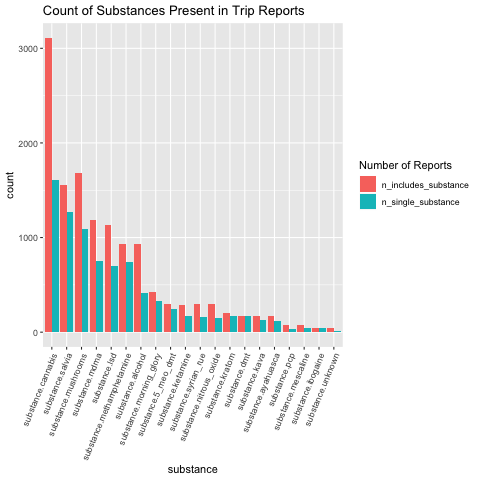

In [26]:
%%R

## This data frame that encodes how many trip reports contains a substance and how many reports are uniquely such a substance'
tripReportsCount_merged.long <- reshape2::melt(tripReportsCount_merged)
# EXPORT: Graph of distribution of substances
tripReportsCount_merged.long %>% ggplot( aes(x = reorder(substance, -value), y = value, fill=variable)) + geom_bar(stat="identity", position = "dodge") + theme(axis.text.x = element_text(angle = 67.5, hjust = 1)) + ggtitle("Count of Substances Present in Trip Reports") + xlab("substance") + ylab("count") + labs(fill = "Number of Reports")

# Appendix

In [27]:
# Explore the dataset trips.csv
import csv
printed = 0
with open('trips.csv') as f:
  csv_reader = csv.reader(f)
  for line in csv_reader:
    if printed < 2:
        print(line)
        printed += 1
    else:
        break

['report', 'title', 'substance']
["After having had some success with other forms of legal highs, I decided to experiment with salvia.  I had heard it was an intense but short acting psychedelic, which intrigued me.  Although I have loved psychedelics since I first discovered them eight years ago, I dont use them that often in part because of the time involved in tripping and analyzing the experience.  That said I have used psychedelics somewhere around three dozen times in my life.  My favorite method of tripping is LSD, but I have also used mushrooms, morning glory and baby woodrose seeds.  I have also used a variety of other drugs, including stimulants, depressants, empathogens, and deleriants.\n\n\n\nI ordered salvia online, choosing a 5x extract.  When the package arrived my husband wanted to try it immediately.  I prefer to prepare more for trips but knowing the effects werent supposed to last very long I said why not?  My husband, who uses psychedelics rarely now but used them a